In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path_to_file = "/home/rychagoal/PycharmProjects/LiquidBiopsy_summary/upload_data/output.csv"
data = pd.read_csv(path_to_file)
data.head(5)

PMID                                              Title  \
0  40123626  Role of Cell-free DNA as a Non-Invasive Biomar...   
1  40060351               Liquid Biopsy and Colorectal Cancer.   
2  40060340  Screening for Colorectal Carcinoma in India: R...   
3  40027946  Advancements in precision oncology: Investigat...   
4  40027945  Unveiling the impact of corticosteroid therapy...   

                                            Abstract  \
0  Head and neck squamous cell carcinomas (HNSCC)...   
1  The majority of patients with colorectal cance...   
2  Noninvasive colorectal cancer (CRC) screening ...   
3  While the traditional method is a biopsy of th...   
4  The liquid biopsy era has brought several poss...   

                                             Authors  \
0  Swati Singh, Rajeev Goyal, Ashna Gupta, Ritu S...   
1  Shyam Aggarwal, Anuradha Chougle, Vineet Talwa...   
2  Mansi Agrawal, Adwaith Krishna Surendran, Kart...   
3  Stootee Baruah, Jenifer Rajak, Arup Kumar Mitr...   
4  Veronica Aran, Jose Orlando de Melo Junior, Ca...   

                                         Affiliation  Year  \
0  Department of Biochemistry, Lady Hardinge Medi...  2025   
1  Department of Medical Oncology, Sir Ganga Ram ...  2024   
2  Medical Student, Mahatma Gandhi Memorial Medic...  2024   
3  Department of Microbiology, St. Xavier's Colle...  2024   
4  Instituto Estadual do C√©rebro Paulo Niemeyer (...  2024   

                                            Keywords  \
0  Cell-free DNA, Head and neck squamous cell car...   
1  biomarker, driver mutations, minimal residual ...   
2  cancer mortality, early detection, liquid biop...   
3  Biomarker, CTC, Clinical application, Precisio...   
4  Glioblastoma, Intracranial tumors, Liquid biop...   

                                          Journal                         DOI  
0  Indian journal of clinical biochemistry : IJCB  10.1007/s12291-024-01181-4  
1                   South Asian journal of cancer      10.1055/s-0044-1801753  
2                   South Asian journal of cancer      10.1055/s-0044-1791225  
3                    The journal of liquid biopsy   10.1016/j.jlb.2024.100157  
4                    The journal of liquid biopsy   10.1016/j.jlb.2024.100149

In [3]:
data.shape

(9683, 9)

In [4]:
data.isna().sum()

PMID              0
Title            51
Abstract        566
Authors          28
Affiliation     133
Year              0
Keywords       1814
Journal           0
DOI             120
dtype: int64

In [5]:
data.dtypes

PMID            int64
Title          object
Abstract       object
Authors        object
Affiliation    object
Year            int64
Keywords       object
Journal        object
DOI            object
dtype: object

In [6]:
# delete empty columns by Title
data = data.drop(data[data["Title"].isnull()].index, axis=0)

In [7]:
# find duplicates
data.duplicated().sum()

0

In [8]:
# drop data for 2025 year (not finished yet)
data = data.drop(data[data["Year"]==2025].index, axis=0)

In [77]:
# save clean data to csv file
path_to_clean_data_file = "/home/rychagoal/PycharmProjects/LiquidBiopsy_summary/upload_data/clean_data.csv"
data.to_csv(path_to_clean_data_file, index=False)

## Data distribution by the year

In [9]:
years = data['Year'].value_counts().sort_index().reset_index()
years.columns = ['Year', 'Count']
years.head(3)

Year  Count
0  2010      1
1  2011      5
2  2012     15

In [42]:
years["Year"].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023, 2024])

/tmp/ipykernel_97989/1723385949.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=years, x="Year", y="Count", palette="Blues_r")


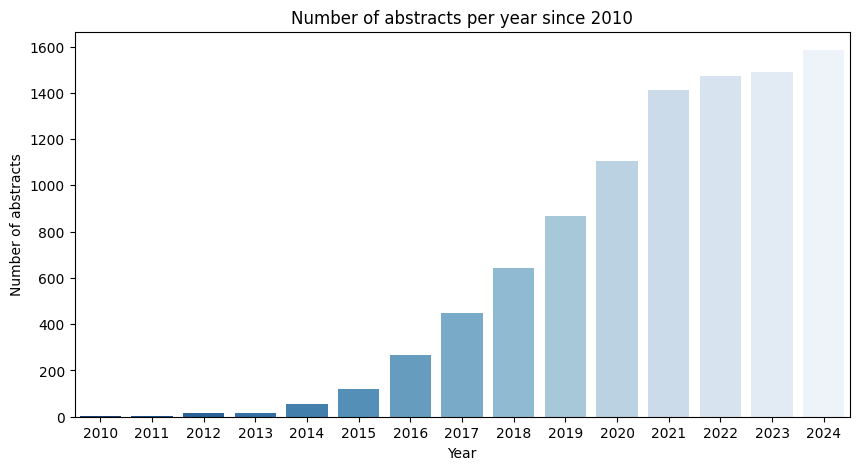

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(data=years, x="Year", y="Count", palette="Blues_r")
plt.title("Number of abstracts per year since 2010")
plt.xlabel("Year")
plt.ylabel("Number of abstracts")
plt.show()

## Get top 10 Journals for publications about liquid biopsy 

In [15]:
journals = data["Journal"]

In [18]:
# Number of journals
journals.nunique()

1478

In [20]:
journals.shape

(9502,)

In [26]:
top_10_journals = journals.value_counts().sort_values(ascending=False).head(10)

In [30]:
journal_names = top_10_journals.index.tolist()
journal_names

['Cancers',
 'Frontiers in oncology',
 'International journal of molecular sciences',
 'Scientific reports',
 'Oncotarget',
 'Methods in molecular biology (Clifton, N.J.)',
 'Diagnostics (Basel, Switzerland)',
 'Expert review of molecular diagnostics',
 'Analytical chemistry',
 'Molecular oncology']

In [55]:
year_journal = data.loc[data['Journal'].isin(journal_names), ['Year', 'Journal']]

In [78]:
year_journal.shape

(2073, 2)

In [56]:
year_journal.isna().sum()

Year       0
Journal    0
dtype: int64

In [58]:
year_journal.columns

Index(['Year', 'Journal'], dtype='object')

In [61]:
year_journal.head(3)

Year                                      Journal
40  2024                        Frontiers in oncology
59  2024                        Frontiers in oncology
71  2024  International journal of molecular sciences

In [63]:
year_journal_counts = year_journal.groupby(["Year", "Journal"]).size().reset_index(name="Count")

In [68]:
year_journal_counts.sort_values(by="Year")

Year                                       Journal  Count
0   2012                         Frontiers in oncology      1
1   2013                                       Cancers      1
2   2013        Expert review of molecular diagnostics      1
3   2014                                       Cancers      2
4   2014        Expert review of molecular diagnostics      1
..   ...                                           ...    ...
93  2024                         Frontiers in oncology     48
94  2024   International journal of molecular sciences     59
95  2024  Methods in molecular biology (Clifton, N.J.)      3
96  2024                            Molecular oncology     15
98  2024                            Scientific reports     32

[99 rows x 3 columns]

In [79]:
year_journal_counts.shape

(99, 3)

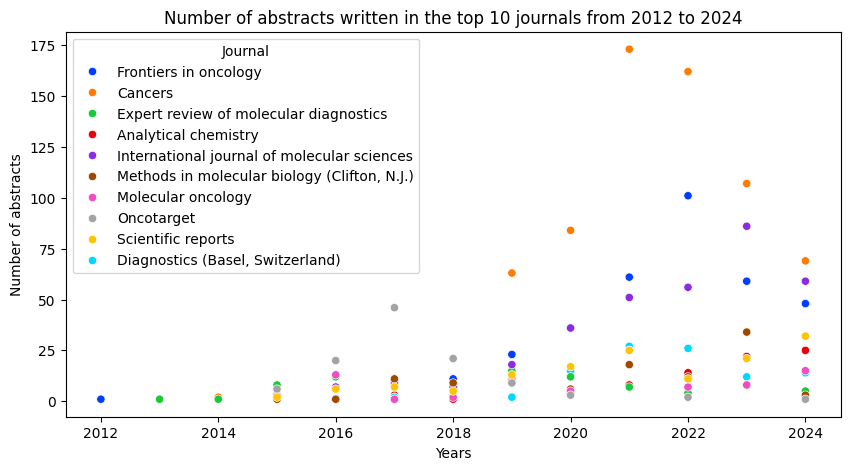

In [76]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=year_journal_counts, x="Year", y="Count", hue="Journal", palette="bright")
plt.title("Number of abstracts written in the top 10 journals from 2012 to 2024")
plt.xlabel("Years")
plt.ylabel("Number of abstracts")
plt.show()

In [200]:
path_to_journals_file = "/home/rychagoal/PycharmProjects/LiquidBiopsy_summary/upload_data/journals.csv"
year_journal_counts.to_csv(path_to_journals_file, index=False)

## Keyword data analysis

In [87]:
# get top keywords

In [102]:
# normalize keywords:
def clean_keyword(kw):
    if not isinstance(kw, str):
        return ""
    kw = kw.lower().strip()
    if kw.endswith('s') and len(kw) > 3:
        kw = kw[:-1]
    return kw

In [119]:
data['Keywords_list'] = data['Keywords'].fillna('').str.split(', ')
data['Keywords_list'] = data['Keywords_list'].apply(lambda lst: [clean_keyword(k) for k in lst if k])

In [124]:
all_keywords = data.explode('Keywords_list')
all_keywords = all_keywords[all_keywords['Keywords_list'] != "liquid biopsy"]
top_keywords = all_keywords['Keywords_list'].value_counts().head(20)

In [145]:
top10_keywords = all_keywords['Keywords_list'].value_counts().head(10)

In [125]:
top_keywords

Keywords_list
biomarker                     1494
circulating tumor cell         832
circulating tumor dna          763
exosome                        757
extracellular vesicle          682
cell-free dna                  550
ctdna                          511
cancer                         487
breast cancer                  394
lung cancer                    378
colorectal cancer              350
cfdna                          291
diagnosi                       290
microrna                       275
prognosi                       267
prostate cancer                259
next-generation sequencing     246
precision medicine             240
mirna                          237
ctc                            223
Name: count, dtype: int64

In [126]:
all_keywords.shape

(41453, 10)

In [127]:
top_keywords = top_keywords.index.to_list()

In [146]:
top10_keywords = top10_keywords.index.to_list()

In [128]:
year_keyword = all_keywords.loc[all_keywords['Keywords_list'].isin(top_keywords), ['Year', 'Keywords_list']]

In [147]:
year_keyword_10 = all_keywords.loc[all_keywords['Keywords_list'].isin(top10_keywords), ['Year', 'Keywords_list']]

In [129]:
year_keyword.shape

(9526, 2)

In [130]:
year_keyword.isna().sum()

Year             0
Keywords_list    0
dtype: int64

In [131]:
year_keyword_counts = year_keyword.groupby(["Year", "Keywords_list"]).size().reset_index(name="Count")

In [148]:
year_keyword_counts_10 = year_keyword_10.groupby(["Year", "Keywords_list"]).size().reset_index(name="Count")

In [142]:
# color palette
keywords = year_keyword_counts['Keywords_list'].unique()
palette = plt.get_cmap('tab20').colors
color_dict = dict(zip(keywords, palette[:len(keywords)]))

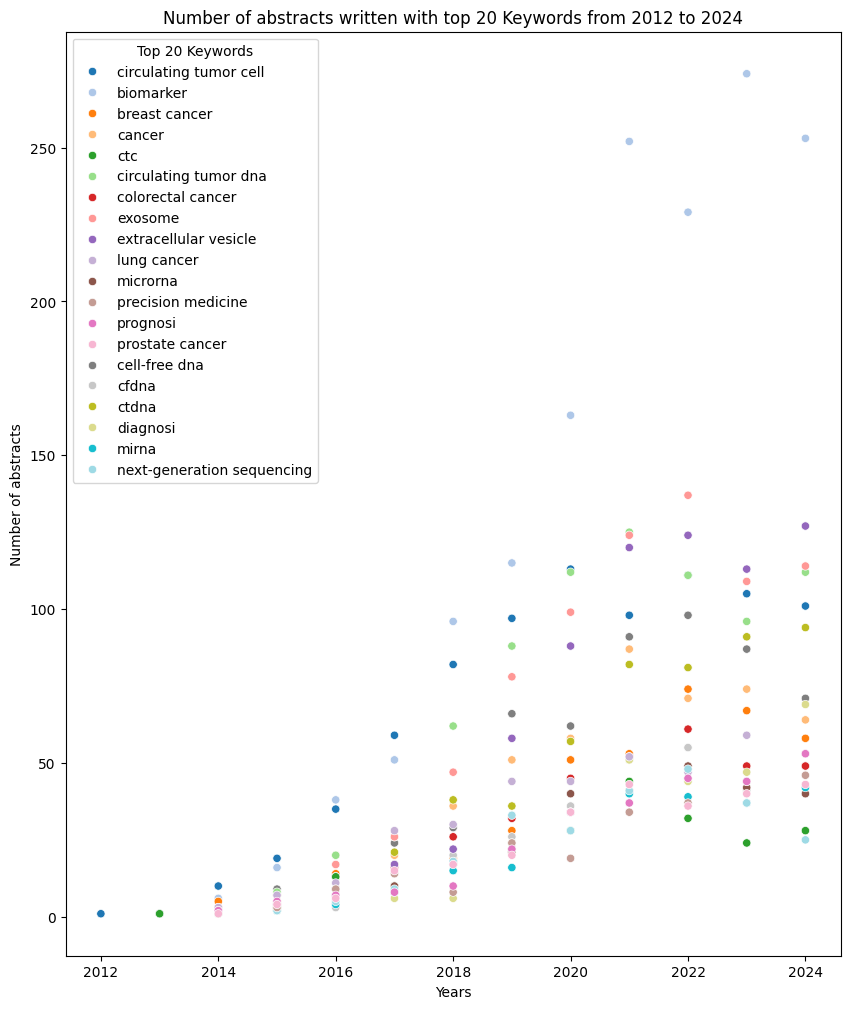

In [156]:
colors = sns.color_palette("bright", 20)
plt.figure(figsize=(10,12))
sns.scatterplot(data=year_keyword_counts, x="Year", y="Count", hue="Keywords_list", palette=color_dict)
plt.title("Number of abstracts written with top 20 Keywords from 2012 to 2024")
plt.xlabel("Years")
plt.ylabel("Number of abstracts")
plt.legend(title="Top 20 Keywords")
plt.show()

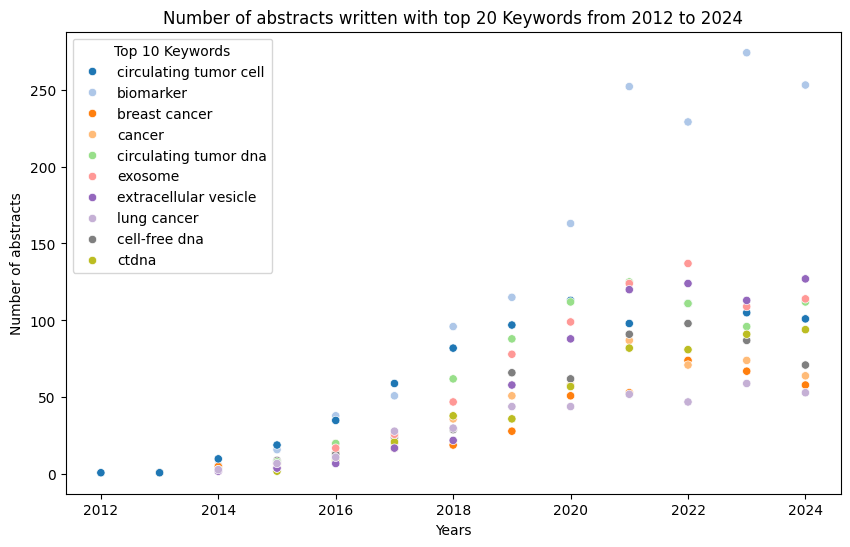

In [155]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=year_keyword_counts_10, x="Year", y="Count", hue="Keywords_list", palette=color_dict)
plt.title("Number of abstracts written with top 20 Keywords from 2012 to 2024")
plt.xlabel("Years")
plt.ylabel("Number of abstracts")
plt.legend(title="Top 10 Keywords")
plt.show()

In [199]:
path_to_KW_file = "/home/rychagoal/PycharmProjects/LiquidBiopsy_summary/upload_data/keywords.csv"
year_keyword_counts_10.to_csv(path_to_KW_file, index=False)

üìà –ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –¥–∏–Ω–∞–º–∏–∫—É –ø–æ –≥–æ–¥–∞–º:

    –ø—É–±–ª–∏–∫–∞—Ü–∏–∏

    –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞

    –¥–æ–ª—è –∫–æ–º–º–µ—Ä—Ü–∏–∏

    –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –ø–æ —Ç–∏–ø–∞–º —Ä–∞–∫–∞

## Analysis by cancer types

Extract cancer types from abstract text

In [194]:
cancer_types = ['lung', 'breast', 'colorectal', 'pancreatic', 'prostate', 'bladder', 'ovarian', 'gastric', 'melanoma']

def extract_cancer_types(text):
    text = text.lower() if isinstance(text, str) else ''
    found = [c for c in cancer_types if c in text]
    return found if found else None

data['Cancer_types'] = data['Abstract'].apply(extract_cancer_types)

In [187]:
# data['Cancer_types'] = data['Cancer_types'].fillna("other")

In [188]:
data.head(5)

PMID                                              Title  \
1  40060351               Liquid Biopsy and Colorectal Cancer.   
2  40060340  Screening for Colorectal Carcinoma in India: R...   
3  40027946  Advancements in precision oncology: Investigat...   
4  40027945  Unveiling the impact of corticosteroid therapy...   
5  40027943  Exploring the clinical utility of liquid biops...   

                                            Abstract  \
1  The majority of patients with colorectal cance...   
2  Noninvasive colorectal cancer (CRC) screening ...   
3  While the traditional method is a biopsy of th...   
4  The liquid biopsy era has brought several poss...   
5  Various tumor cells may exhibit different gene...   

                                             Authors  \
1  Shyam Aggarwal, Anuradha Chougle, Vineet Talwa...   
2  Mansi Agrawal, Adwaith Krishna Surendran, Kart...   
3  Stootee Baruah, Jenifer Rajak, Arup Kumar Mitr...   
4  Veronica Aran, Jose Orlando de Melo Junior, Ca...   
5  Keerthi Ranganathan, Neethu Sheri Kurian, Hite...   

                                         Affiliation  Year  \
1  Department of Medical Oncology, Sir Ganga Ram ...  2024   
2  Medical Student, Mahatma Gandhi Memorial Medic...  2024   
3  Department of Microbiology, St. Xavier's Colle...  2024   
4  Instituto Estadual do C√©rebro Paulo Niemeyer (...  2024   
5  4baseCare, BHIVE Workspace Whitefield, 8th Flo...  2024   

                                            Keywords  \
1  biomarker, driver mutations, minimal residual ...   
2  cancer mortality, early detection, liquid biop...   
3  Biomarker, CTC, Clinical application, Precisio...   
4  Glioblastoma, Intracranial tumors, Liquid biop...   
5  Cell-free DNA (cfDNA), Circulating tumor DNA (...   

                         Journal                         DOI  \
1  South Asian journal of cancer      10.1055/s-0044-1801753   
2  South Asian journal of cancer      10.1055/s-0044-1791225   
3   The journal of liquid biopsy   10.1016/j.jlb.2024.100157   
4   The journal of liquid biopsy   10.1016/j.jlb.2024.100149   
5   The journal of liquid biopsy  10.3390/healthcare10091714   

                                       Keywords_list  Cancer_types  
1  [biomarker, driver mutation, minimal residual ...  [colorectal]  
2  [cancer mortality, early detection, liquid bio...  [colorectal]  
3  [biomarker, ctc, clinical application, precisi...         other  
4  [glioblastoma, intracranial tumor, liquid biop...         other  
5  [cell-free dna (cfdna), circulating tumor dna ...         other

In [195]:
year_cancertype = data.explode('Cancer_types')
year_cancertypes = year_cancertype.groupby(["Year", "Cancer_types"]).size().reset_index(name="Count")

In [191]:
data.shape

(9502, 11)

In [190]:
year_cancertype.shape

(10152, 11)

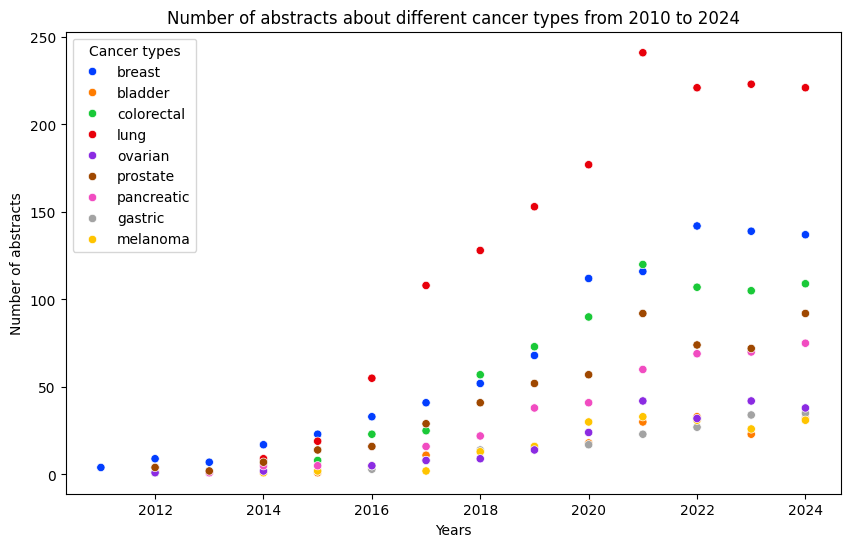

In [196]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=year_cancertypes, x="Year", y="Count", hue="Cancer_types", palette="bright")
plt.title("Number of abstracts about different cancer types from 2010 to 2024")
plt.xlabel("Years")
plt.ylabel("Number of abstracts")
plt.legend(title="Cancer types")
plt.show()

In [198]:
path_to_types_file = "/home/rychagoal/PycharmProjects/LiquidBiopsy_summary/upload_data/cancer_types.csv"
year_cancertypes.to_csv(path_to_types_file, index=False)